In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from msresist.RNAseq import preprocess_AXL_RNAseq_data, filter_by_EvEAvar
from msresist.pca import plotPCA_scoresORloadings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams['font.sans-serif'] = "Arial"
sns.set(style="whitegrid", font_scale=1, color_codes=True, palette="colorblind", rc={"grid.linestyle": "dotted", "axes.linewidth": 0.6})

In [2]:
br1 = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/Luminex/120522-YAPKO_E_EA.csv")
br2 = pd.read_csv("/home/marcc/AXLomics/msresist/data/Validations/Luminex/012923-YAPKO_EA_BR2.csv")
br1_phos = br1[br1["Analyte"] == "p-AXL"]
br2_phos = br2[br2["Analyte"] == "p-AXL"]
br1_phos.iloc[:9, 3] /= np.mean(br1_phos.iloc[:3], axis=0).values
br1_phos.iloc[9:, 3] /= np.mean(br1_phos.iloc[9:12], axis=0).values
br2_phos.iloc[:6, 3] /= np.mean(br2_phos.iloc[:2], axis=0).values
br2_phos.iloc[6:, 3] /= np.mean(br2_phos.iloc[6:8], axis=0).values

/home/marcc/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [4]:
br1_tot

,Cell Line,Treatment,Abundance
0,WT,E,2340.000000
1,WT,EA,1610.666667
2,WT,UT,1420.500000
3,YAP KO,E,2553.000000
4,YAP KO,EA,1698.500000
5,YAP KO,UT,3751.000000


In [15]:
br1_tot = br1[br1["Analyte"] == "total AXL"]
br2_tot = br2[br2["Analyte"] == "total AXL"]
br1_tot.iloc[:9, 3] /= np.mean(br1_tot.iloc[:3], axis=0).values
br1_tot.iloc[9:, 3] /= np.mean(br1_tot.iloc[9:12], axis=0).values
br2_tot.iloc[:6, 3] /= np.mean(br2_tot.iloc[:2], axis=0).values
br2_tot.iloc[6:, 3] /= np.mean(br2_tot.iloc[6:8], axis=0).values

/home/marcc/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


/tmp/ipykernel_3394772/218255020.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(c, x="Treatment", hue="Cell Line", y="Abundance", ci=68, ax=ax)


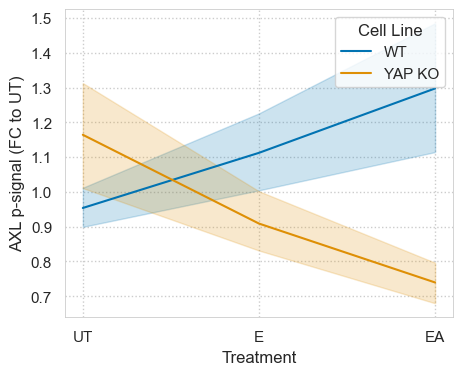

In [17]:
c = pd.concat([br1_tot, br2_tot, br1_phos, br2_phos])
_, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.lineplot(c, x="Treatment", hue="Cell Line", y="Abundance", ci=68, ax=ax)
ax.set_ylabel("AXL p-signal (FC to UT)")
plt.savefig("YAPKO_EA.svg")